# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

C:\Users\IM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
pd

<module 'pandas' from 'C:\\Users\\IM\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [9]:
df[df['_STATE'].isin([9,34,36])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34545 entries, 49938 to 303778
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), int64(5), object(1)
memory usage: 94.6+ MB


**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
#Changing 88's to 0's
df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 88, 0, df['PHYSHLTH'])
#don't want to inpute mean because it is the dependent variable, so vast majority of the time you drop it.
#Particularly if it's your dependent variable. But this might skew your survey.
#Maybe the people who didn't answer were really sick, maybe had 30 days but were embarrased to say.
#Drop it, but maybe check it after. Like if there was a weight number. Were they above average weight or below
#Height, demographic? Political?
df['PHYSHLTH'] = np.where(((df['PHYSHLTH'] == 77) | (df['PHYSHLTH'] == 99)), np.nan, df['PHYSHLTH'])

In [12]:
#zero.dict = {88:0,
#77: np.nan
#    etc}

#df['PHYSHLTH'].replace

In [13]:
# Drop the nan values
df.dropna(subset=['PHYSHLTH'], inplace = True)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [14]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

<AxesSubplot:>

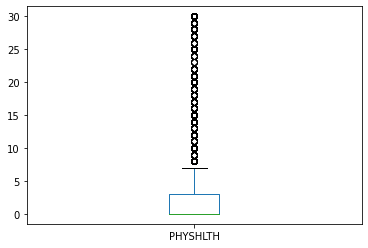

In [15]:
df['PHYSHLTH'].plot(kind = 'box')

(array([2.2834e+04, 3.1800e+03, 1.7140e+03, 8.2800e+02, 1.1400e+02,
        7.5900e+02, 7.9000e+01, 9.6600e+02, 3.1000e+01, 2.9000e+01,
        4.7200e+02, 1.6000e+01, 1.6600e+02, 2.9000e+01, 2.5300e+03]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30.]),
 <BarContainer object of 15 artists>)

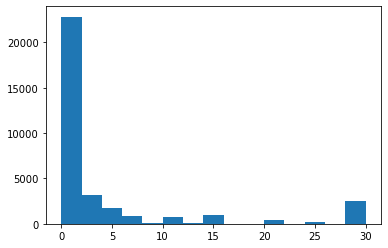

In [16]:
# graph the distribution of data
fig, ax = plt.subplots()

ax.hist(df['PHYSHLTH'], bins = 15)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [17]:
#Convert state code into string for state
df['_STATE'] = np.where(df['_STATE'] == 9.0, 'Conn',
                 np.where(df['_STATE'] == 34.0, 'NJ',
                     np.where(df['_STATE'] == 36.0, 'NY',
                         df['_STATE'])))

In [18]:
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
Conn    3.688562
NJ      4.380957
NY      4.148030
Name: PHYSHLTH, dtype: float64

In [19]:
df.groupby('_STATE')['PHYSHLTH'].mean().values

array([3.68856237, 4.38095654, 4.14802964])

In [20]:
df.groupby('_STATE')['PHYSHLTH'].mean().keys()

Index(['Conn', 'NJ', 'NY'], dtype='object', name='_STATE')

Text(0, 0.5, 'AVG Days Sick')

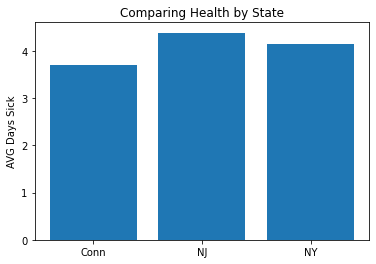

In [21]:
fig, ax = plt.subplots()
ax.bar(
    x = df.groupby('_STATE')['PHYSHLTH'].mean().keys(),
    height = df.groupby('_STATE')['PHYSHLTH'].mean().values)

ax.set_title('Comparing Health by State')
ax.set_ylabel('AVG Days Sick')

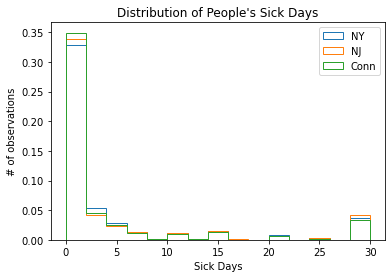

In [22]:
fig, ax = plt.subplots()

ax.hist(df[df['_STATE'] == 'NY']['PHYSHLTH'], bins = 15, density = True, histtype = 'step')#color = 'w', edgecolor = 'green')
ax.hist(df[df['_STATE'] == 'NJ']['PHYSHLTH'], bins = 15, density = True, histtype = 'step')#color = 'w', edgecolor = 'orange')
ax.hist(df[df['_STATE'] == 'Conn']['PHYSHLTH'], bins = 15, density = True, histtype = 'step')#color = 'w', edgecolor = 'blue')

ax.set_title('Distribution of People\'s Sick Days')
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.legend(['NY', 'NJ', 'Conn'])

In [23]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [24]:
# code to create new colum for chronically sick. You define this.

df['chron'] = np.where(df['PHYSHLTH']>20, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [25]:
df.groupby('_STATE')['chron'].mean()

_STATE
Conn    0.073466
NJ      0.094519
NY      0.081088
Name: chron, dtype: float64

In [26]:
# code to calculate averages per state


Text(0, 0.5, 'AVG Days Sick')

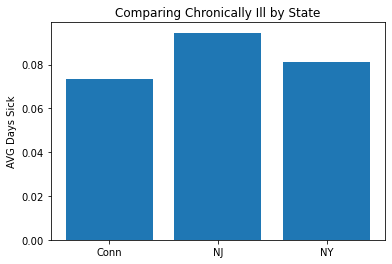

In [27]:
fig, ax = plt.subplots()
ax.bar(
    x = df.groupby('_STATE')['chron'].mean().keys(),
    height = df.groupby('_STATE')['chron'].mean().values)

ax.set_title('Comparing Chronically Ill by State')
ax.set_ylabel('AVG Days Sick')

In [28]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [29]:
df['SMOKDAY2']

49938     NaN
49939     NaN
49940     NaN
49941     NaN
49942     3.0
         ... 
303774    1.0
303775    NaN
303776    3.0
303777    NaN
303778    NaN
Name: SMOKDAY2, Length: 33747, dtype: float64

In [30]:
df['SMOKDAY2'] = np.where(df['SMOKDAY2'] == 1, 'Everyday', 
                    np.where(df['SMOKDAY2'] == 2, 'Some Days', 
                        np.where(df['SMOKDAY2'] == 3, 'Non Smoker', 
                            np.where(df['SMOKDAY2'] == 7, 'Don\'t Know', 
                                np.where(df['SMOKDAY2'] == 9, 'Refused', 
                                    np.where(df['SMOKE100'] == 2, 'Non Smoker',
                                        np.where(df['SMOKE100'] == 7, 'Don\'t Know',
                                            np.where(df['SMOKE100'] == 9, 'Refused', 
                                                df['SMOKDAY2']))))))))

In [31]:
df['SMOKDAY2'].value_counts(normalize = True)

Non Smoker    0.835008
Everyday      0.077370
nan           0.041130
Some Days     0.039589
Don't Know    0.004949
Refused       0.001956
Name: SMOKDAY2, dtype: float64

In [32]:
def smoking_percent(dataset, status):
    return round(((len(dataset[dataset['SMOKDAY2'] == status ]))/len(dataset['SMOKDAY2']))*100, 2)

Text(0, 0.5, 'Percent of Study')

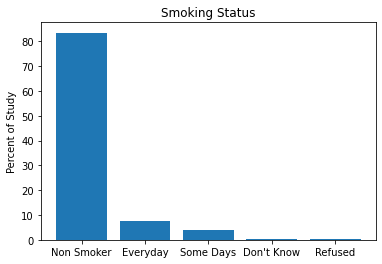

In [33]:
fig, ax = plt.subplots()
status = ['Non Smoker', 'Everyday', 'Some Days', 'Don\'t Know', 'Refused']

ax.bar(
    x = status,
    height = [smoking_percent(df, x) for x in status])

ax.set_title('Smoking Status')
ax.set_ylabel('Percent of Study')

In [34]:
# code to graph those proportion of differen smoking groups using matplotlib


In [35]:
def smoke_percent_by_state(state, status):
    return round(((len(df[(df['SMOKDAY2'] == status) & (df['_STATE'] == state)]))/len(df[df['_STATE'] == state]))*100, 2)

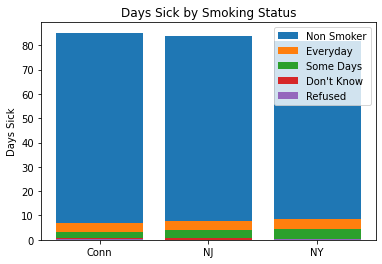

In [36]:
fig, ax = plt.subplots()

status = ['Non Smoker', 'Everyday', 'Some Days', 'Don\'t Know', 'Refused']
conn_smoke_percent = [smoke_percent_by_state('Conn', x) for x in status]
nj_smoke_percent = [smoke_percent_by_state('NJ', x) for x in status]
ny_smoke_percent = [smoke_percent_by_state('NY', x) for x in status]
smoke_percent_list = [conn_smoke_percent, nj_smoke_percent, ny_smoke_percent]
labels = ['Conn', 'NJ', 'NY']

ax.bar(
    x = labels,
    height = [x[0] for x in smoke_percent_list],
    label = status[0])
ax.bar(
    x = labels,
    height = [x[1] for x in smoke_percent_list],
    label = status[1])
ax.bar(
    x = labels,
    height = [x[2] for x in smoke_percent_list],
    label = status[2])
ax.bar(
    x = labels,
    height = [x[3] for x in smoke_percent_list],
    label = status[3])
ax.bar(
    x = labels,
    height = [x[4] for x in smoke_percent_list],
    label = status[4])

ax.set_ylabel('Days Sick')
ax.set_title('Days Sick by Smoking Status')
ax.legend()

<AxesSubplot:xlabel='_STATE'>

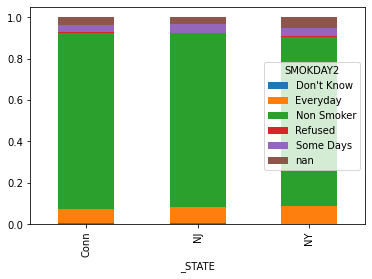

In [37]:
df.groupby(['_STATE'])['SMOKDAY2'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True)

In [38]:
#graph showing the breakdown of smokers per state

<AxesSubplot:title={'center':'Days Sick by Smoking Status'}, ylabel='Days Sick'>

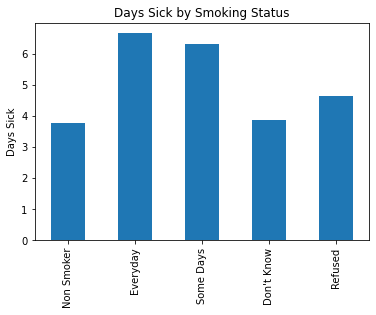

In [39]:
df.groupby(['SMOKDAY2'])['PHYSHLTH'].mean()\
.loc[['Non Smoker', 'Everyday', 'Some Days', 'Don\'t Know', 'Refused']]\
.plot(
    kind = 'bar',
    title = 'Days Sick by Smoking Status',
    xlabel = '',
    ylabel = 'Days Sick')

In [40]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [41]:
# code here to clean up the ALCDAY5 responses

df['ALCDAY5'] = np.where(df['ALCDAY5'].isin(range(101,108)), (df['ALCDAY5'] - 100)*4, 
                    np.where(df['ALCDAY5'].isin(range(201,231)), (df['ALCDAY5'] - 200), 
                        np.where(df['ALCDAY5'] == 888, 0, 
                            np.nan)))

In [42]:
#descriptive statistics of cleaned data
df['ALCDAY5'].describe()

count    31532.000000
mean         5.339116
std          8.194317
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCDAY5, dtype: float64

Text(0, 0.5, '# of observations')

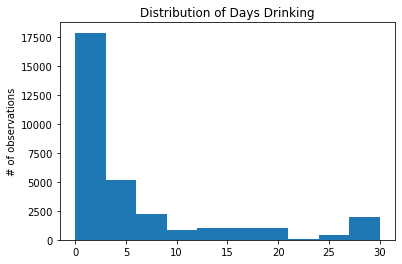

In [43]:
fig, ax = plt.subplots()


ax.hist(df['ALCDAY5'])

ax.set_title('Distribution of Days Drinking')
ax.set_ylabel('# of observations')

<AxesSubplot:ylabel='Frequency'>

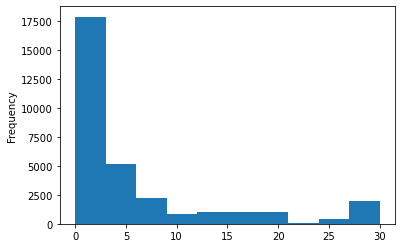

In [44]:
df['ALCDAY5'].plot(kind = 'hist')

In [45]:
# graphic showing the histogram of data


In [46]:
# code to calculate averages per state
df.groupby('_STATE')['ALCDAY5'].mean()

_STATE
Conn    6.036227
NJ      4.913481
NY      5.139898
Name: ALCDAY5, dtype: float64

In [47]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

In [48]:
df['PHYSHLTH'].corr(df['ALCDAY5'])

-0.09044343519081319

## 8. Statistical Inference


In [49]:
from scipy import stats
import math

- Create a 95% confidence interval for the population mean of physically ill days.

In [ ]:
df['PHYSHLTH'].describe()

In [ ]:
mean = df['PHYSHLTH'].mean()
std = df['PHYSHLTH'].std()
z = 1.96
n = len(df)

lower = mean - (z*(std/math.sqrt(n)))
upper = mean + (z*(std/math.sqrt(n)))

lower, upper

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [ ]:
p = df['chron'].value_counts(normalize = True)[1]
z = 1.96
n = len(df[df['chron'] == 1])

lower = p - (z * math.sqrt((p*(1-p))/n))
upper = p + (z * math.sqrt((p*(1-p))/n))

lower, upper

___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.

In [ ]:
# 1.1 Null: The population mean is 4.
#    Alternative: The population mean is not 4.

# 1.2) 1 Sample T-Test
# 1.3) 1.96
# 1.4)
result = stats.ttest_1samp(df['PHYSHLTH'].values, 4)
t_stat, p_value = result
result
# 1.5) We fail to reject the null hypothesis. 
# Our hypothesis test returned a pvalue of .06 which is higher than our alpha value of .05.
# Test statistic is less than 1.96

2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

In [ ]:
# 2.1) Null: There is a statistically significant difference between men and women in 
            # the number of days a person feels physically ill.
# Alternative: There is not a statistically significant difference between men and
            # women in the number of days a person feels physically ill.

#2.2) Difference of two means
#2.3)1.96
#2.4)
phys_male = df[df['SEX'] == 1]['PHYSHLTH'].values
phys_female = df[df['SEX'] == 2]['PHYSHLTH'].values

stats.ttest_ind(phys_male, phys_female)
#2.5) We reject the null hypothesis because the pvalue of 2.3e-13 is smaller than alpha.

3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 

In [ ]:
# 3.1) Null: There is a statistically significant difference in physical health
            # of people from CT, NJ, and NY.
# Alternative: There is not a statistically significant difference in physical health
            # of people from CT, NJ, and NY.

#3.2) Anova
#3.3) 1.96
#3.4)
Conn = df[df['_STATE'] == 'Conn']['PHYSHLTH']
NJ = df[df['_STATE'] == 'NJ']['PHYSHLTH']
NY = df[df['_STATE'] == 'NY']['PHYSHLTH']

groups = {'Conn':Conn, 'NJ':NJ, 'NY':NY}
stats.f_oneway(*groups.values())
#3.5) We reject the null hypothesis because the pvalue of 8.8e-09 is smaller than alpha.

### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?

In [56]:
# 1.1) Null: The true population proportion of chronically sick people is .10.
# Alternative: The true population proportion of chronically sick people is not .10.

#1.2) Population proportion
#1.3) 1.96
#1.4)
p_hat = df['chron'].value_counts(normalize = True)[1]
p_0 = .10
n = len(df)

(p_hat - p_0)/math.sqrt((p_0 * (1 - p_0))/n)

#1.5) We reject the null hypothesis because the our test statistic is -10.23 which is far lower than our critical value
    # of -1.96.

-10.228435110973303

In [57]:
stats.ttest_1samp(df['chron'].values, .1)

Ttest_1sampResult(statistic=-11.104440555557627, pvalue=1.3380063979477957e-28)

2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [ ]:
# 2.1) Null: There is a statistically significant difference 
            #in the percentage of men and women who are chronically sick.
#Alternative: There is not a statistically significant difference 
            #in the percentage of men and women who are chronically sick.

#2.2) two proportions z-test
#2.3) 1.96
#2.4)
x1 = len(df[(df['SEX'] == 1) & (df['chron'] == 1)])
n1 = len(df[df['SEX'] == 1])
p1 = df[df['SEX'] == 1]['chron'].value_counts(normalize = True)[1]

x2 = len(df[(df['SEX'] == 2) & (df['chron'] == 1)])
n2 = len(df[df['SEX'] == 2])
p2 = df[df['SEX'] == 2]['chron'].value_counts(normalize = True)[1]

pstar = (x1+x2)/(n1+n2)

z = (p1 - p2)/math.sqrt(pstar*(1-pstar)*((1/n1)+(1/n2)))
z

#2.5) We reject the null hypothesis because the our test statistic is -3.64 which is far lower than our critical value
    # of -1.96.

In [ ]:
p1, p2

3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

In [ ]:
# 3.1) Null: There is a statistically significant difference in proportion 
            #of people with chronic health issues from CT, NJ, and NY.
    # You can just say the proportions do equal each other.
# Alternative: There is not a statistically significant difference in proportion 
            #of people with chronic health issues from CT, NJ, and NY.
    # You can say that they don't equal each other.
#3.2) Chi Squared
#3.3) 1.96
#3.4)
conn = df[df['_STATE'] == 'Conn']['chron'].value_counts()
NJ = df[df['_STATE'] == 'NJ']['chron'].value_counts()
NY = df[df['_STATE'] == 'NY']['chron'].value_counts()

zero_vals = [conn[0], NJ[0], NY[0]]
one_vals = [conn[1], NJ[1], NY[1]]

items = np.array([[zero_vals],
                  [one_vals]])

stats.contingency.chi2_contingency(items)

#3.5) We reject the null hypothesis because the p-value is 7.41e-08

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

In [ ]:
df['potato'] = 0
df['potato'] = \
np.where(df['FRENCHF1'].isin(range(101,200)), +(df['FRENCHF1'] - 100), 
    np.where(df['FRENCHF1'].isin(range(201,300)), +((df['FRENCHF1'] - 200)/7), 
        np.where(df['FRENCHF1'].isin(range(301,400)), +((df['FRENCHF1'] - 300)/30.42), 
            np.where(df['FRENCHF1'] == 300, +.016, 
#                np.where(df['FRENCHF1'] == 555, +0,
#                    np.where(df['FRENCHF1'] == 777, +0,
#                        np.where(df['FRENCHF1'] == 999, +0,
#                            np.where(df['FRENCHF1'].isna(), +0,
                                df['potato']))))#))))

In [ ]:
df['potato'] =\
np.where(df['POTATOE1'].isin(range(101,200)), +(df['POTATOE1'] - 100),
    np.where(df['POTATOE1'].isin(range(201,300)), +((df['POTATOE1'] - 200)/7),
        np.where(df['POTATOE1'].isin(range(301,400)), +((df['POTATOE1'] - 300)/30.42),
            np.where(df['POTATOE1'] == 300, +.016, 
#                np.where(df['POTATOE1'] == 555, +0,
#                    np.where(df['POTATOE1'] == 777, +0,
#                        np.where(df['POTATOE1'] == 999, +0,
#                            np.where(df['POTATOE1'].isna(), +0,
                                df['potato']))))#))))

In [ ]:
df['potato'] =\
np.where((df['FRENCHF1'] == 777) & (df['POTATOE1'] == 777), np.nan,
    np.where((df['FRENCHF1'] == 777) & (df['POTATOE1'] == 999), np.nan,
        np.where((df['FRENCHF1'] == 777) & (df['POTATOE1'].isna()), np.nan,
            np.where((df['FRENCHF1'] == 999) & (df['POTATOE1'] == 777), np.nan,
                np.where((df['FRENCHF1'] == 999) & (df['POTATOE1'] == 999), np.nan,
                    np.where((df['FRENCHF1'] == 999) & (df['POTATOE1'].isna()), np.nan,
                        np.where((df['FRENCHF1'].isna()) & (df['POTATOE1'] == 777), np.nan,
                            np.where((df['FRENCHF1'].isna()) & (df['POTATOE1'] == 999), np.nan,
                                np.where((df['FRENCHF1'].isna()) & (df['POTATOE1'].isna()), np.nan,
                                    df['potato'])))))))))

In [ ]:
# Using 'potato', daily number of potato consumption

In [ ]:
# 1. Determine sample mean and sample std
mean = df['potato'].mean()
std = df['potato'].std()
mean, std

In [ ]:
#2. Create a confidence interval for a pop mean.
mean = df['potato'].mean()
std = df['potato'].std()
z = 1.96
n = len(df[df['potato'].isna() != True])

lower = mean - (z*(std/math.sqrt(n)))
upper = mean + (z*(std/math.sqrt(n)))

lower, upper

In [ ]:
# 3.1) Null: There is a statistically significant difference between men and women in 
            # the average number of times potatos are consumed.
# Alternative: There is not a statistically significant difference between men and
            # women in the average number of times potatos are consumed.

#3.2) Difference of two means
#3.3) 1.96
#3.4)
potato_male = df[(df['SEX'] == 1) & (df['potato'].isna() != True)]['potato'].values
potato_female = df[(df['SEX'] == 2) & (df['potato'].isna() != True)]['potato'].values

stats.ttest_ind(potato_male, potato_female)
#3.5) We reject the null hypothesis because the pvalue of .0005 is smaller than alpha.

In [ ]:
potato_male.mean(), potato_female.mean()

In [ ]:
# 4.1) Null: There is a statistically significant difference in the number of times potatoes are consumed
            # for people from CT, NJ, and NY.
# Alternative: There is not a statistically significant difference in the number of times potatoes are consumed
            # for people from CT, NJ, and NY.

#4.2) Anova
#4.3) 1.96
#4.4)
Conn_potato = df[(df['_STATE'] == 'Conn') & (df['potato'].isna() != True)]['potato']
NJ_potato = df[(df['_STATE'] == 'NJ') & (df['potato'].isna() != True)]['potato']
NY_potato = df[(df['_STATE'] == 'NY') & (df['potato'].isna() != True)]['potato']

groups_potato = {'Conn':Conn_potato, 'NJ':NJ_potato, 'NY':NY_potato}
stats.f_oneway(*groups_potato.values())

#4.5) We reject the null hypothesis because the pvalue of 3.68e-07 is smaller than alpha.

In [ ]:
Conn_potato.mean(), NJ_potato.mean(), NY_potato.mean()

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

In [ ]:
#Cancer Rates
df['cancer'] = np.where(df['CHCSCNCR'] == 1, 1, 
                    np.where(df['CHCSCNCR'] == 2, 0, 
                        np.where(df['CHCOCNCR'] == 1, 1, 
                            np.where(df['CHCOCNCR'] == 2, 0, 
                                np.nan))))

In [ ]:
# 1. Create a confidence interval for a pop proportion
p = df['cancer'].value_counts(normalize = True)[1]
z = 1.96
n = len(df[df['cancer'] == 1])

lower = p - (z * math.sqrt((p*(1-p))/n))
upper = p + (z * math.sqrt((p*(1-p))/n))

lower, upper

In [ ]:
# 2.1) Null: There is a statistically significant difference 
            #in the percentage of men and women who have had cancer.
#Alternative: There is not a statistically significant difference 
            #in the percentage of men and women who have had cancer.

#2.2) two proportions z-test
#2.3) 1.96
#2.4)
x1 = len(df[(df['SEX'] == 1) & (df['cancer'] == 1)])
n1 = len(df[df['SEX'] == 1])
p1 = df[df['SEX'] == 1]['cancer'].value_counts(normalize = True)[1]

x2 = len(df[(df['SEX'] == 2) & (df['cancer'] == 1)])
n2 = len(df[df['SEX'] == 2])
p2 = df[df['SEX'] == 2]['cancer'].value_counts(normalize = True)[1]

pstar = (x1+x2)/(n1+n2)

z = (p1 - p2)/math.sqrt(pstar*(1-pstar)*((1/n1)+(1/n2)))
z

#2.5) We fail to reject the null hypothesis because the p-value is .80, greater than our alpha value.

In [ ]:
# 3.1) Null: There is a statistically significant difference in proportion 
            #of people with cancer from CT, NJ, and NY.
# Alternative: There is not a statistically significant difference in proportion 
            #of people with cancer from CT, NJ, and NY.

#3.2) Chi Squared
#3.3) 1.96
#3.4)
conn = df[df['_STATE'] == 'Conn']['cancer'].value_counts()
NJ = df[df['_STATE'] == 'NJ']['cancer'].value_counts()
NY = df[df['_STATE'] == 'NY']['cancer'].value_counts()

zero_vals = [conn[0], NJ[0], NY[0]]
one_vals = [conn[1], NJ[1], NY[1]]

items = np.array([[zero_vals],
                  [one_vals]])
stats.contingency.chi2_contingency(items)

#3.5) We reject the null hypothesis because the p-value is 3.66e-18, smaller than our alpha value.

In [ ]:
# chi squared the distribution changes depending on the distribution so you can't really memorize them
# it's not like z where 95% = 1.96
#df.groupby(['_STATE', 'chron'])['ANy table'].count() Then unstack this. and put into items. putting argument into unstack
# makes it transposed. By adding '_STATE' it, it makes the states the columns
#However putting it in 2x3 versus 3x2 doesn't change the result. Because test of homogeneity versus //
#there's slightly different way to interpret it, but it does the same test.

#Not testing for statistically significant difference. For 9A, testing if mean equals the proposed
#population mean.